In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report, f1_score 
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

In [58]:
df = pd.read_csv(r'03_Cleaned_File(Data Preprocessing).csv')

In [59]:
df.head()

,CustomerId,Surname,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,0,42,101348.88,0.00,1,1,2,1,1,0,0
1,15647311,Hill,608,0,41,112542.58,83807.86,1,1,1,1,0,0,1
2,15619304,Onio,502,0,42,113931.57,159660.80,3,0,8,0,1,0,0
3,15701354,Boni,699,0,39,93826.63,0.00,2,0,1,0,0,0,0
4,15737888,Mitchell,850,0,43,79084.10,125510.82,1,1,2,1,0,0,1


In [60]:
X = df.drop(columns = ['CustomerId', 'Surname', 'Exited'])
y = df['Exited']

In [61]:
X.head()

,CreditScore,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Geography_Germany,Geography_Spain
0,619,0,42,101348.88,0.00,1,1,2,1,0,0
1,608,0,41,112542.58,83807.86,1,1,1,1,0,1
2,502,0,42,113931.57,159660.80,3,0,8,0,0,0
3,699,0,39,93826.63,0.00,2,0,1,0,0,0
4,850,0,43,79084.10,125510.82,1,1,2,1,0,1


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y)

In [63]:
num_features = ['CreditScore', 'Age', 'EstimatedSalary', 'Balance']
preprocessor = ColumnTransformer(transformers = [('num', StandardScaler(), num_features)],
                                 remainder = 'passthrough',
                                 force_int_remainder_cols=False)

In [64]:
steps = [("preprocess", preprocessor),
         ("adasyn", ADASYN(random_state = 42)),
         ("logistic_regression", LogisticRegression(random_state = 42))]

In [65]:
steps

[('preprocess',
  ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                    transformers=[('num', StandardScaler(),
                                   ['CreditScore', 'Age', 'EstimatedSalary',
                                    'Balance'])])),
 ('adasyn', ADASYN(random_state=42)),
 ('logistic_regression', LogisticRegression(random_state=42))]

In [66]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'EstimatedSalary',
                                                   'Balance'])])),
                ('adasyn', ADASYN(random_state=42)),
                ('logistic_regression', LogisticRegression(random_state=42))])

In [67]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'EstimatedSalary',
                                                   'Balance'])])),
                ('adasyn', ADASYN(random_state=42)),
                ('logistic_regression', LogisticRegression(random_state=42))])

In [68]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1633  756]
 [ 153  458]]


In [70]:
cm

array([[1633,  756],
       [ 153,  458]], dtype=int64)

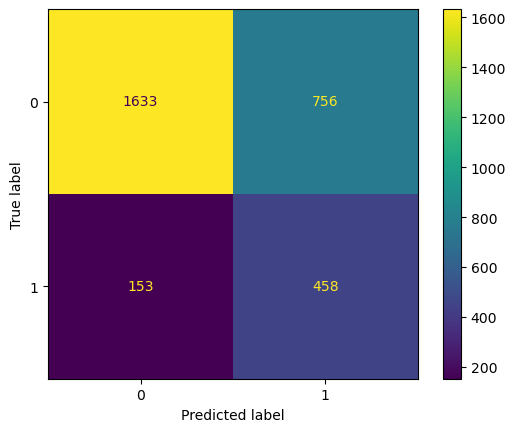

In [71]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [72]:
class0_accuracy = cm[0,0] / cm[0].sum()
class1_accuracy = cm[1,1] / cm[1].sum()
print(f"Class 0 Accuracy: {class0_accuracy:.2f}")
print(f"Class 1 Accuracy: {class1_accuracy:.2f}")

Class 0 Accuracy: 0.68
Class 1 Accuracy: 0.75


In [73]:
print(f'Accuracy : {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision : {precision_score(y_test, y_pred):.2f}')
print(f'Recall : {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score : {f1_score(y_test, y_pred):.2f}')

Accuracy : 0.70
Precision : 0.38
Recall : 0.75
F1 Score : 0.50


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      2389
           1       0.38      0.75      0.50       611

    accuracy                           0.70      3000
   macro avg       0.65      0.72      0.64      3000
weighted avg       0.80      0.70      0.73      3000

